In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
data = pd.read_csv('voting-survey_response.csv', index_col='RespId')
data = data.fillna(0)
data.replace('Some college', 'College', inplace=True)
data['Age_grp'] = pd.cut(data['age'], bins=[18, 35, 60, 100], labels=['Young', 'Middle', 'Old'])
data

,weight,age,Education,race,gender,income_cat,voter_category,Q1,Q2_1,Q2_2,...,Q29_2,Q29_3,Q29_4,Q29_5,Q29_6,Q29_7,Q29_8,Q29_9,Q29_10,Age_grp
RespId,,,,,,,,,,,,,,,,,,,,,
470001,0.7516,73,College,White,Female,$75-125k,always,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Old
470002,1.0267,90,College,White,Female,$125k or more,always,1,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Old
470003,1.0844,53,College,White,Male,$125k or more,sporadic,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Middle
470007,0.6817,58,College,Black,Female,$40-75k,sporadic,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Middle
480008,0.9910,81,High school or less,White,Male,$40-75k,always,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Old
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477662,1.1916,27,College,Hispanic,Male,$40-75k,always,1,1,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Young
477663,1.4623,59,High school or less,White,Female,$125k or more,rarely/never,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Middle
488322,0.9252,51,College,Other/Mixed,Male,$125k or more,sporadic,1,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Middle


### **Unique values**

In [40]:
def count_unique_values(column_name):
    if column_name in data.columns:
        unique_counts = data[column_name].value_counts()
        return unique_counts
    else:
        return f"Column '{column_name}' not found in the data."

column_name = 'Q29_10'
unique_counts = count_unique_values(column_name)
print(unique_counts)

Q29_10
 0.0    4494
-1.0    1141
 1.0     201
Name: count, dtype: int64


# **Community Engagement and Participation**

<Axes: >

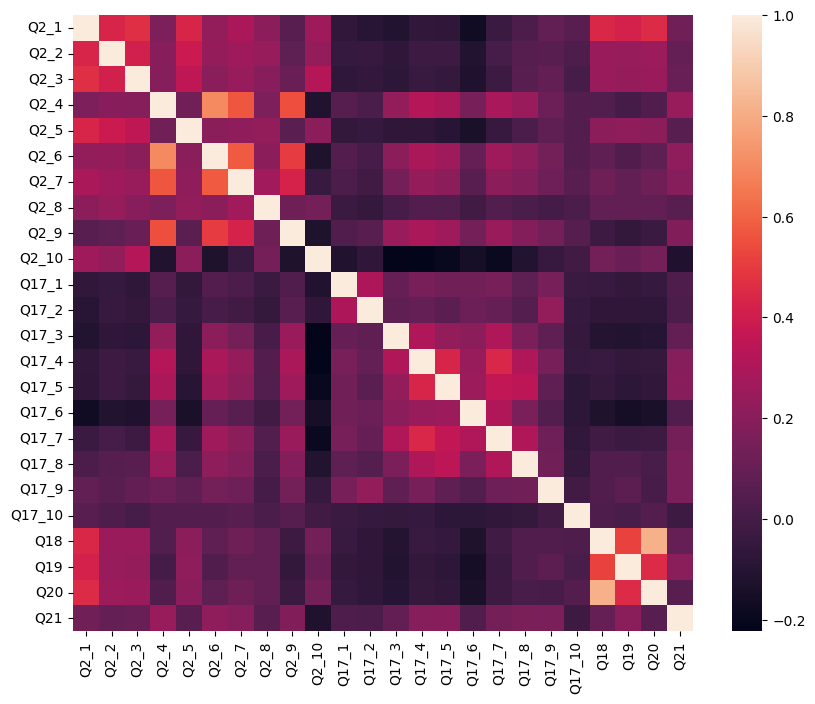

In [4]:
temp_data1 = data[['Q2_1', 'Q2_2', 'Q2_3', 'Q2_4', 'Q2_5', 'Q2_6', 'Q2_7', 'Q2_8', 'Q2_9', 'Q2_10', 'Q17_1', 'Q17_2',
                 'Q17_3', 'Q17_4', 'Q17_5', 'Q17_6', 'Q17_7', 'Q17_8', 'Q17_9', 'Q17_10', 'Q18', 'Q19', 'Q20', 'Q21']]

ax, fig = plt.subplots(figsize=(10, 8))
sns.heatmap(temp_data1.corr())

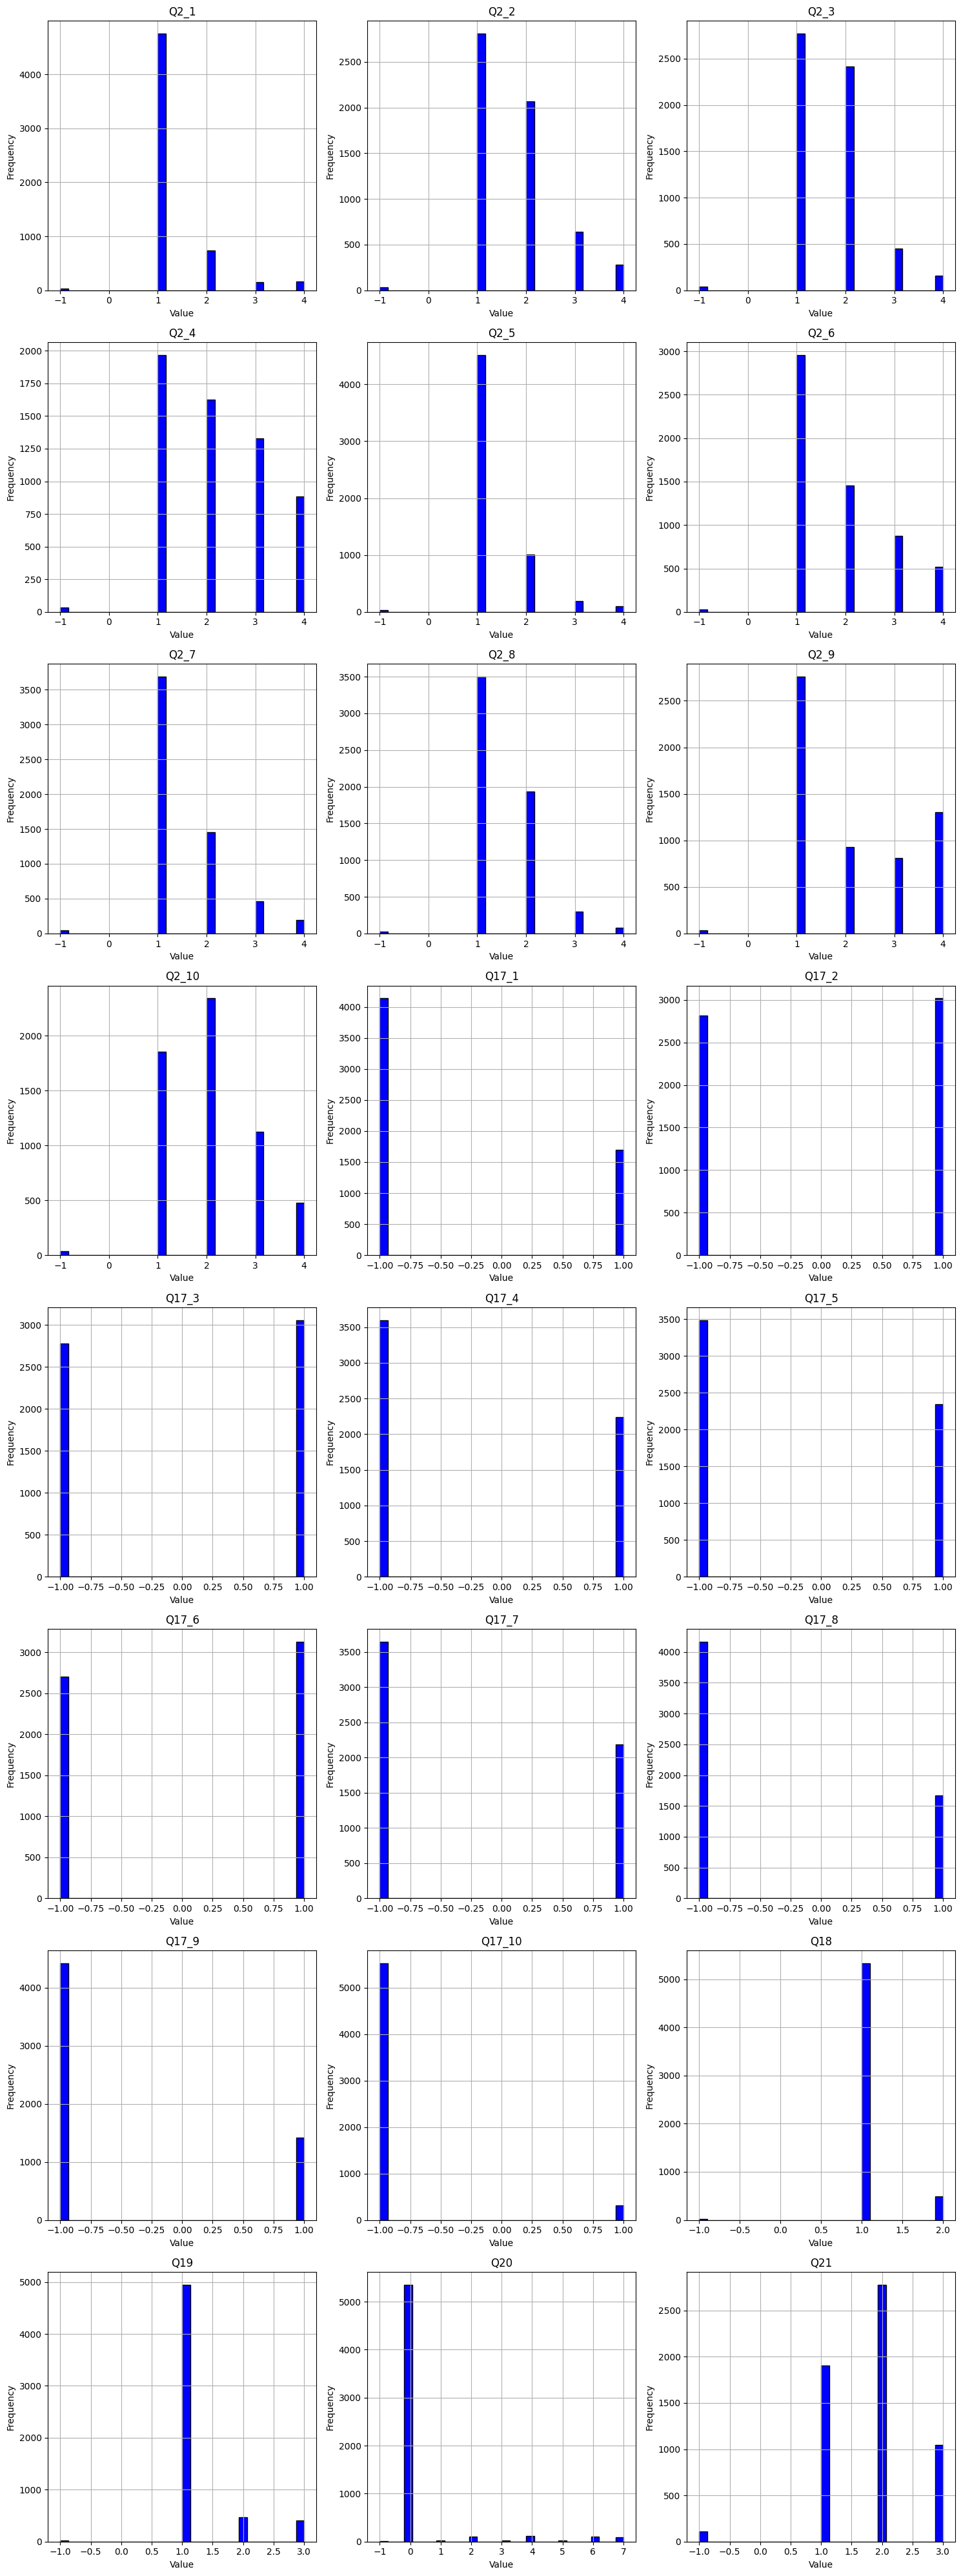

In [5]:
num_columns = len(temp_data1.columns)
cols = 3
rows = math.ceil(num_columns / cols)
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5))

if rows * cols > 1:
    axes = axes.flatten()

for i, column in enumerate(temp_data1.columns):
    axes[i].hist(temp_data1[column], bins=30, color='blue', edgecolor='black')
    axes[i].set_title(f'{column}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True)

if rows * cols > num_columns:
    for j in range(num_columns, rows * cols):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# **Union Elections and Voting**

<Axes: >

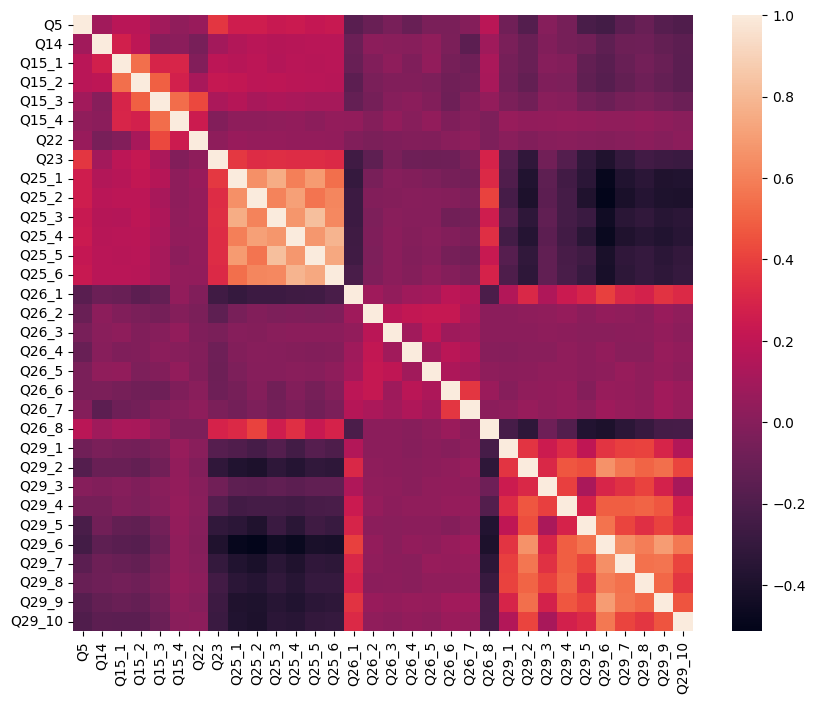

In [6]:
temp_data2 = data[['Q5', 'Q14', 'Q15_1', 'Q15_2', 'Q15_3', 'Q15_4', 'Q22', 'Q23', 'Q25_1', 'Q25_2', 'Q25_3', 'Q25_4',
                 'Q25_5', 'Q25_6', 'Q26_1', 'Q26_2', 'Q26_3', 'Q26_4', 'Q26_5', 'Q26_6', 'Q26_7', 'Q26_8', 'Q29_1', 'Q29_2',
                 'Q29_3', 'Q29_4', 'Q29_5', 'Q29_6', 'Q29_7', 'Q29_8', 'Q29_9', 'Q29_10',]]

ax, fig = plt.subplots(figsize=(10, 8))
sns.heatmap(temp_data2.corr())

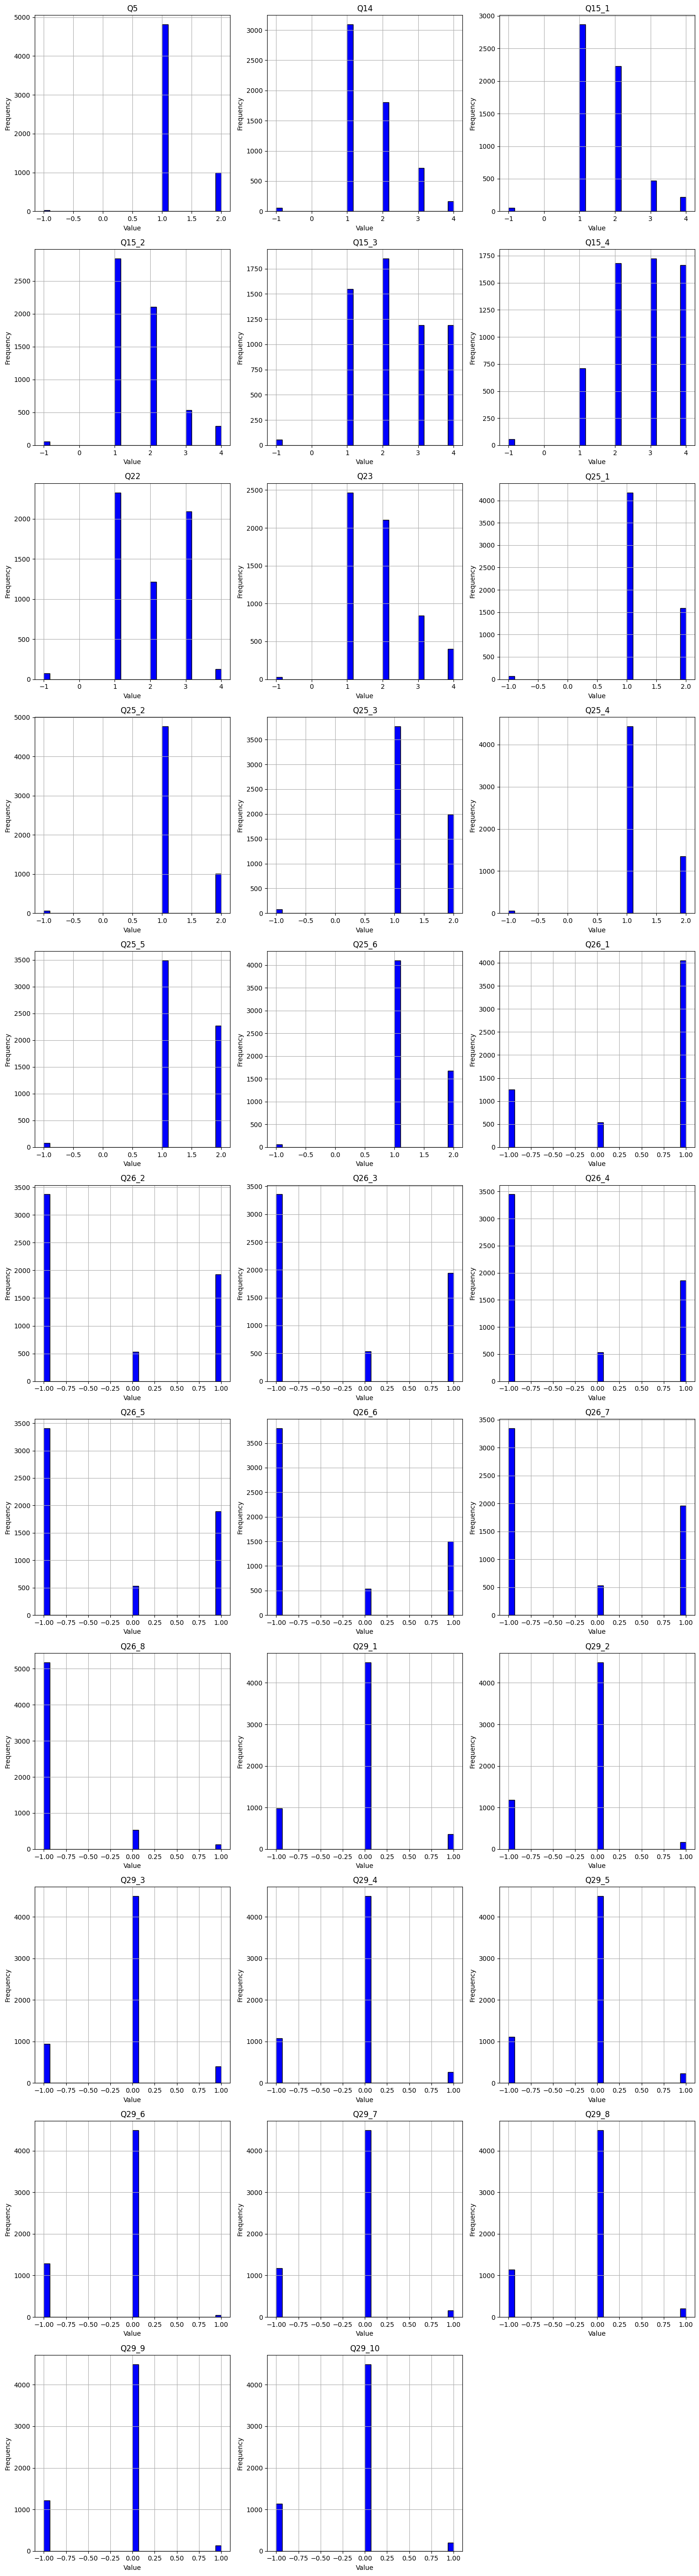

In [7]:
num_columns = len(temp_data2.columns)
cols = 3
rows = math.ceil(num_columns / cols)
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5))

if rows * cols > 1:
    axes = axes.flatten()

for i, column in enumerate(temp_data2.columns):
    axes[i].hist(temp_data2[column], bins=30, color='blue', edgecolor='black')
    axes[i].set_title(f'{column}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True)

if rows * cols > num_columns:
    for j in range(num_columns, rows * cols):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

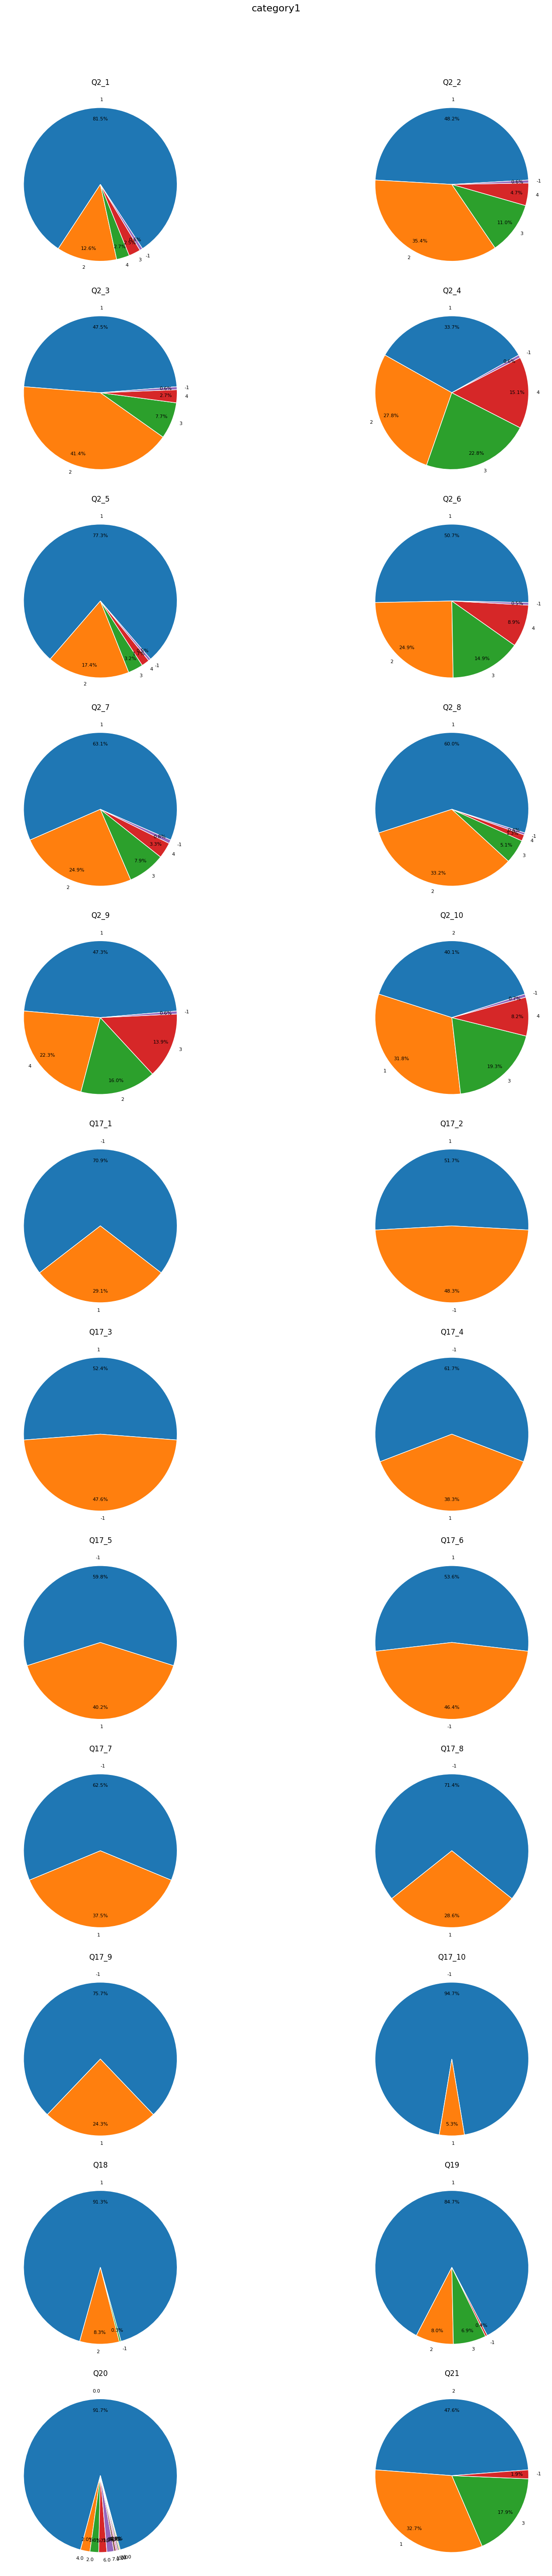

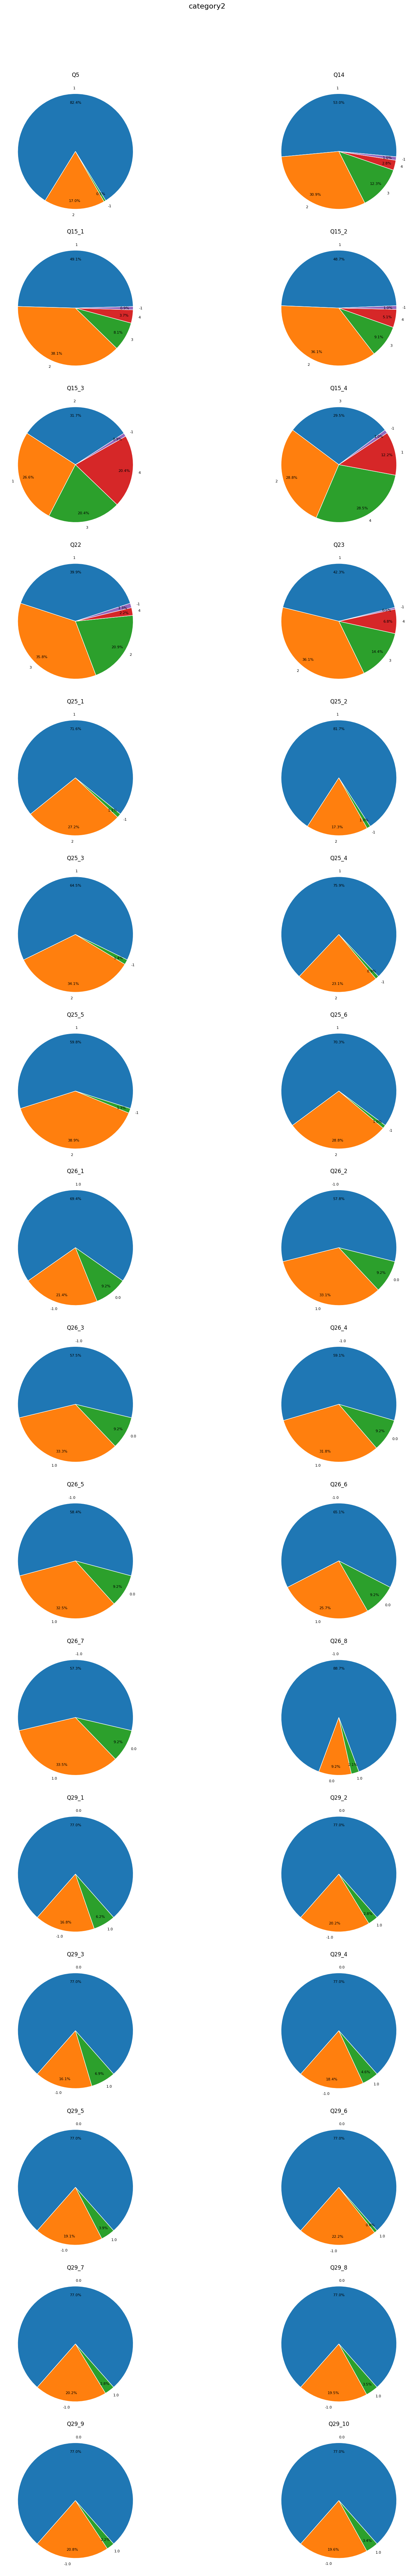

In [8]:
import matplotlib.pyplot as plt
from math import ceil

def plot_pie_charts(data, columns, file_prefix):
    num_plots = len(columns)
    rows = ceil(num_plots / 2)
    fig_size = (20, rows * 5)

    plt.figure(figsize=fig_size)
    for i, col in enumerate(columns):
        values = data[col].value_counts()
        largest_segment_value = values.max()
        largest_segment_index = values.idxmax()
        
        total = values.sum()
        angles = (values.cumsum() - values / 2) / total * 360
        startangle = 90 - angles[largest_segment_index]

        plt.subplot(rows, 2, i + 1)
        data[col].value_counts().plot.pie(
            autopct='%1.1f%%',
            startangle=startangle,
            textprops={'fontsize': 8},
            wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
            pctdistance=0.85
        )
        plt.title(col, fontsize=12)
        plt.ylabel('')
        plt.gca().set_aspect('equal')
    
    plt.suptitle(file_prefix, fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.savefig(f'{file_prefix}.png')
    plt.show()

plot_pie_charts(temp_data1, temp_data1.columns, 'category1')
plot_pie_charts(temp_data2, temp_data2.columns, 'category2')